In [1]:
import pandas, seaborn, matplotlib, numpy

# user-defined variables

In [2]:
gold_file = '/Users/adrian/tmp/gold.csv'
skyblue_file = '/Users/adrian/tmp/skyblue.csv'

In [3]:
gold_file = 'gold.csv'
skyblue_file = 'skyblue.csv'

metadata_file = '/home/adrian/databases/gtex/GTEX_phenotype.tsv'

In [4]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

# read data

In [5]:
gold_df = pandas.read_csv(gold_file, index_col=0)
print(gold_df.shape)

skyblue_df = pandas.read_csv(skyblue_file, index_col=0)
print(skyblue_df.shape)

(2346, 4385)
(4252, 4385)


In [6]:
metadata = pandas.read_csv(metadata_file, sep='\t', index_col=0)

# define best order for gold cluster

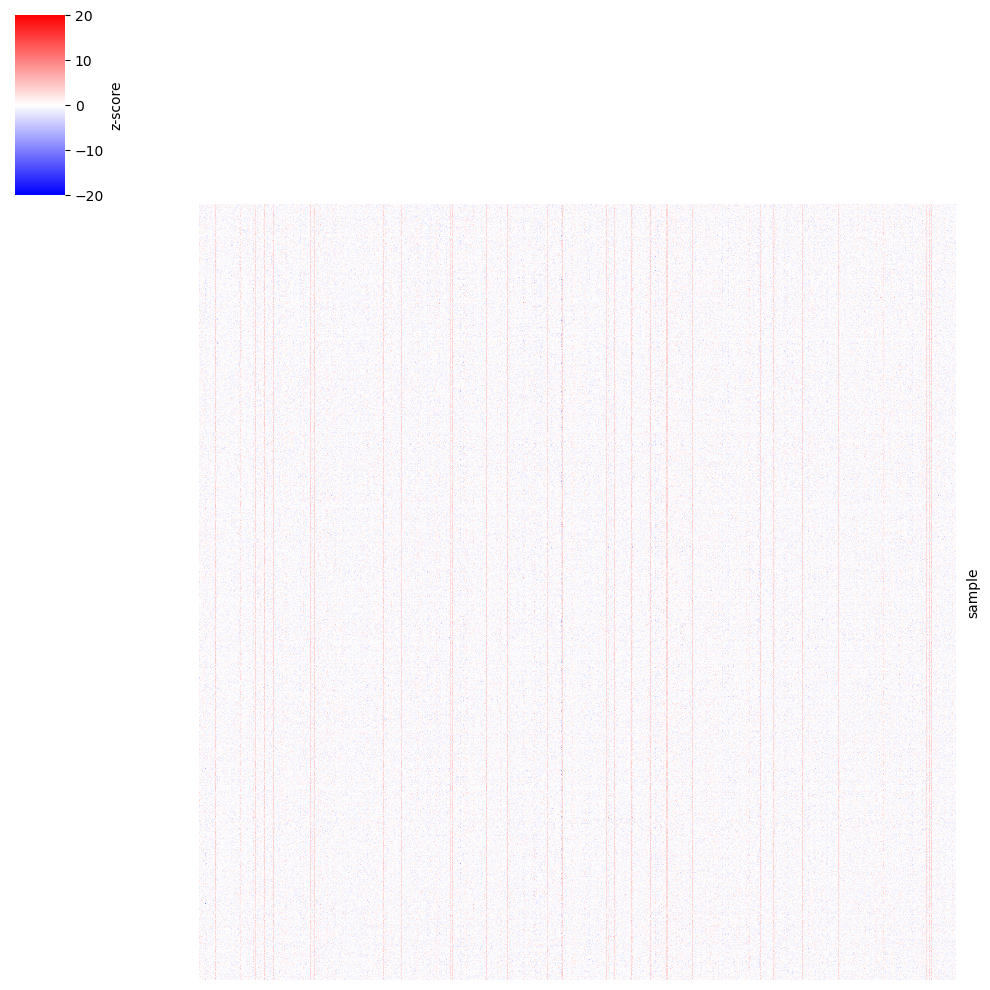

In [7]:
seaborn.clustermap(gold_df, 
                   cmap='bwr', 
                   row_cluster=False, 
                   col_cluster=False, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False
                  )
matplotlib.pyplot.show()

CPU times: user 20.8 s, sys: 128 ms, total: 21 s
Wall time: 21 s


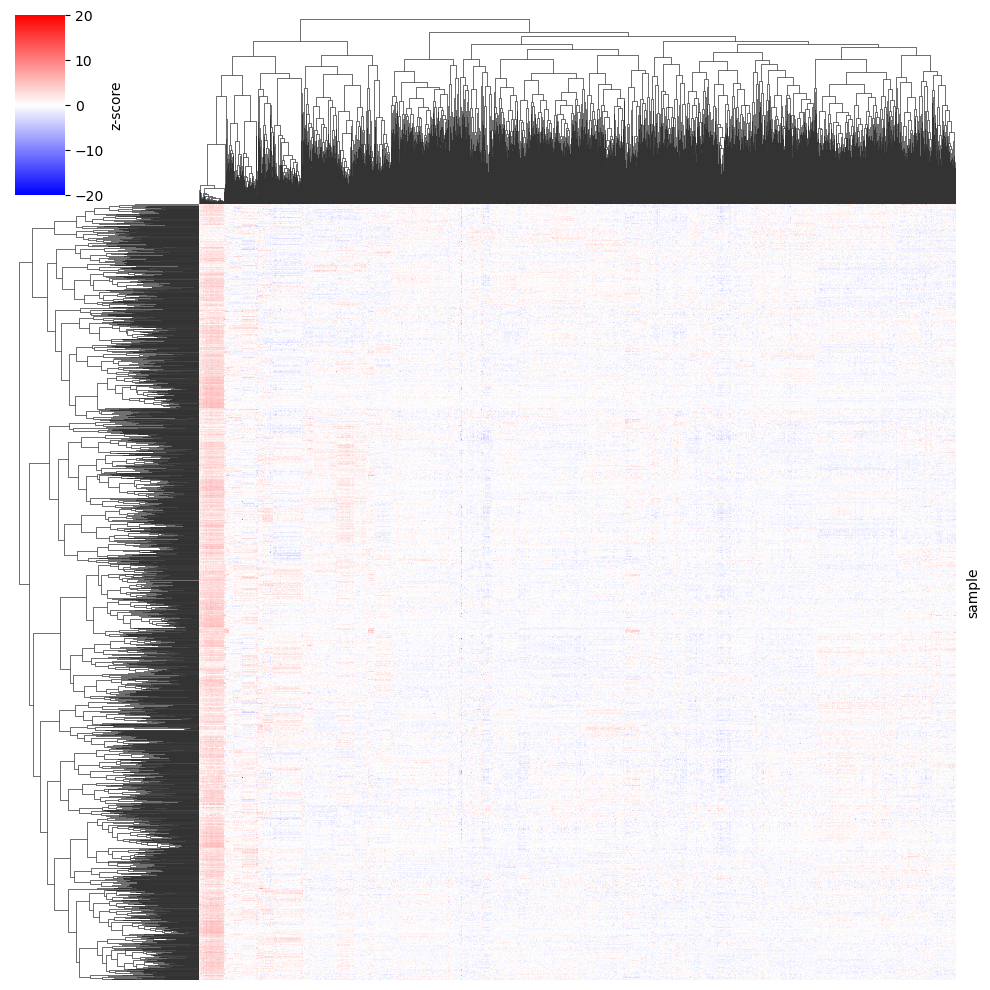

In [8]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

clustergrid = seaborn.clustermap(gold_df, 
                   cmap='bwr', 
                   row_cluster=True, 
                   col_cluster=True, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False, 
                   method=linkage_method, metric=distance_metric
                  )

In [9]:
reordered_gold = gold_df.iloc[clustergrid.dendrogram_row.reordered_ind, :]

# define best order for skyblue cluster

CPU times: user 47.2 s, sys: 232 ms, total: 47.4 s
Wall time: 47.4 s


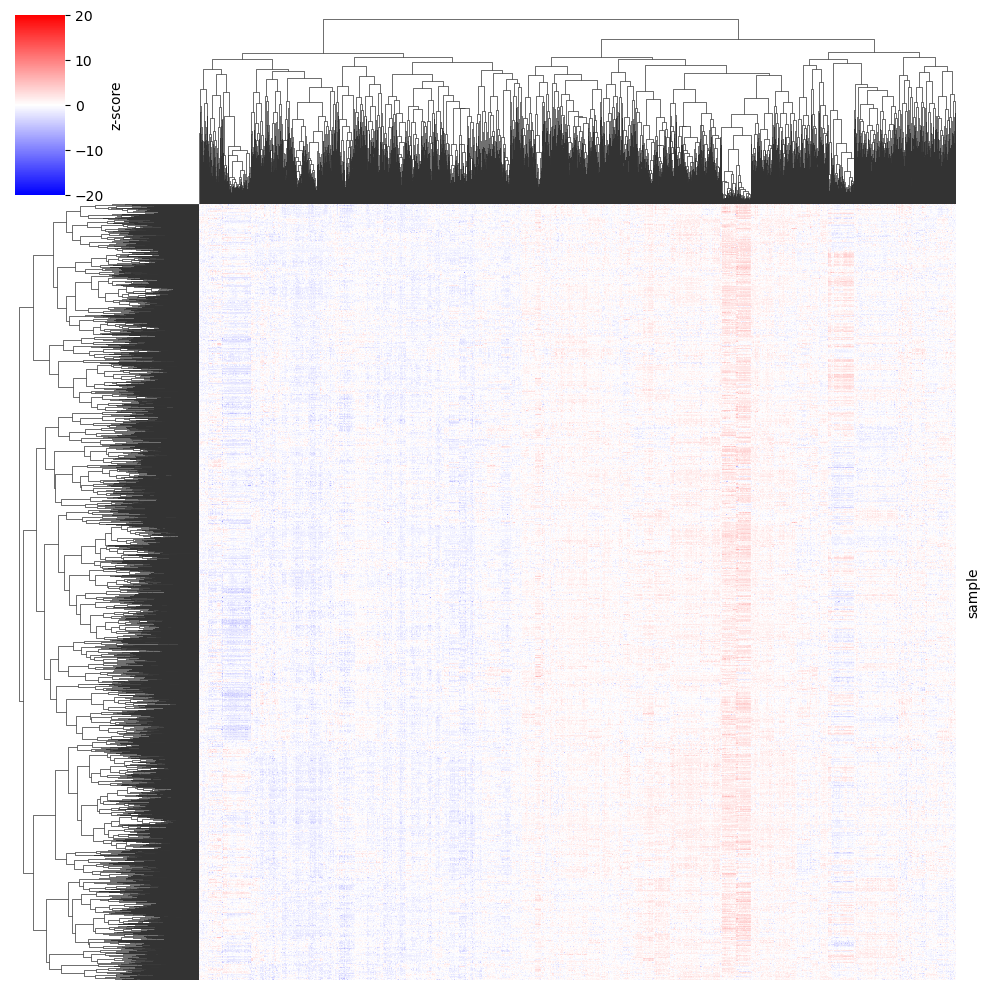

In [10]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

clustergrid = seaborn.clustermap(skyblue_df, 
                   cmap='bwr', 
                   row_cluster=True, 
                   col_cluster=True, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False, 
                   method=linkage_method, metric=distance_metric
                  )

In [11]:
reordered_skyblue = skyblue_df.iloc[clustergrid.dendrogram_row.reordered_ind, :]

# join

In [12]:
print(reordered_gold.shape)
print(reordered_skyblue.shape)

(2346, 4385)
(4252, 4385)


In [13]:
frames = [reordered_gold, reordered_skyblue]
result = pandas.concat(frames)
print(result.shape)

(6598, 4385)


In [14]:
print(result.min().min())
print(result.max().max())

-14.88701243994536
11.081926341742069


In [15]:
# make a histogram

# prepare metadata information

## rows

In [16]:
row_colors = []
for i in range(reordered_gold.shape[0]):
    row_colors.append('gold')
for i in range(reordered_skyblue.shape[0]):
    row_colors.append('skyblue')

## columns

In [17]:
# dealing with appropiate tissue names

tissues = []
for ID in result.columns:
    tissue = metadata.loc[ID]['_primary_site']
    tissues.append(tissue)

unique_tissues = list(set(tissues))
print(len(unique_tissues), unique_tissues)

small_sample_tissues = []
for tissue in unique_tissues:
    k = tissues.count(tissue)
    if k < 20:
        print(tissue, k)
        small_sample_tissues.append(tissue)
    else:
        print('\t', tissue, k)
        
for i in range(len(tissues)):
    if tissues[i] in small_sample_tissues:
        tissues[i] = 'other'

unique_tissues = list(set(tissues))
unique_tissues.sort()
print(len(unique_tissues), unique_tissues)

32 ['Testis', 'Spleen', 'Adrenal Gland', 'Muscle', 'Bladder', 'Pituitary', 'Heart', 'Kidney', 'Salivary Gland', 'Blood Vessel', 'Ovary', 'Lung', 'Bone Marrow', 'Liver', 'Uterus', 'Breast', 'Esophagus', 'Blood', 'Nerve', 'Pancreas', 'Brain', 'Adipose Tissue', 'Stomach', 'Small Intestine', 'Prostate', 'Colon', 'Thyroid', 'Vagina', 'Fallopian Tube', 'Cervix Uteri', '<not provided>', 'Skin']
	 Testis 161
	 Spleen 91
	 Adrenal Gland 52
Muscle 6
Bladder 9
	 Pituitary 104
Heart 14
Kidney 9
	 Salivary Gland 42
	 Blood Vessel 496
	 Ovary 86
	 Lung 277
Bone Marrow 11
Liver 3
	 Uterus 71
	 Breast 159
	 Esophagus 411
	 Blood 78
	 Nerve 259
Pancreas 6
	 Brain 260
	 Adipose Tissue 421
	 Stomach 55
	 Small Intestine 76
	 Prostate 94
	 Colon 223
	 Thyroid 258
	 Vagina 77
Fallopian Tube 5
Cervix Uteri 10
<not provided> 2
	 Skin 559
23 ['Adipose Tissue', 'Adrenal Gland', 'Blood', 'Blood Vessel', 'Brain', 'Breast', 'Colon', 'Esophagus', 'Lung', 'Nerve', 'Ovary', 'Pituitary', 'Prostate', 'Salivary Gland',

# mapping tissues to colors

In [18]:
cmap = matplotlib.pyplot.cm.get_cmap('tab20', 20)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

color_list.append('indigo')
color_list.append('khaki')
color_list.append('black')

print(color_list)

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5', 'indigo', 'khaki', 'black']


In [19]:
column_colors = []
for tissue in tissues:
    selected_color = color_list[unique_tissues.index(tissue)]
    column_colors.append(selected_color)
print(column_colors[:10])

['#ff7f0e', '#ffbb78', '#9edae5', '#9edae5', '#ffbb78', '#9467bd', '#7f7f7f', '#9edae5', '#c5b0d5', '#c5b0d5']


In [20]:
legend_colors = []
for i in range(len(unique_tissues)):
    selected_color = color_list[i]
    legend_colors.append(selected_color)

# cluster conditions

108 3250
CPU times: user 54.5 s, sys: 548 ms, total: 55 s
Wall time: 55 s


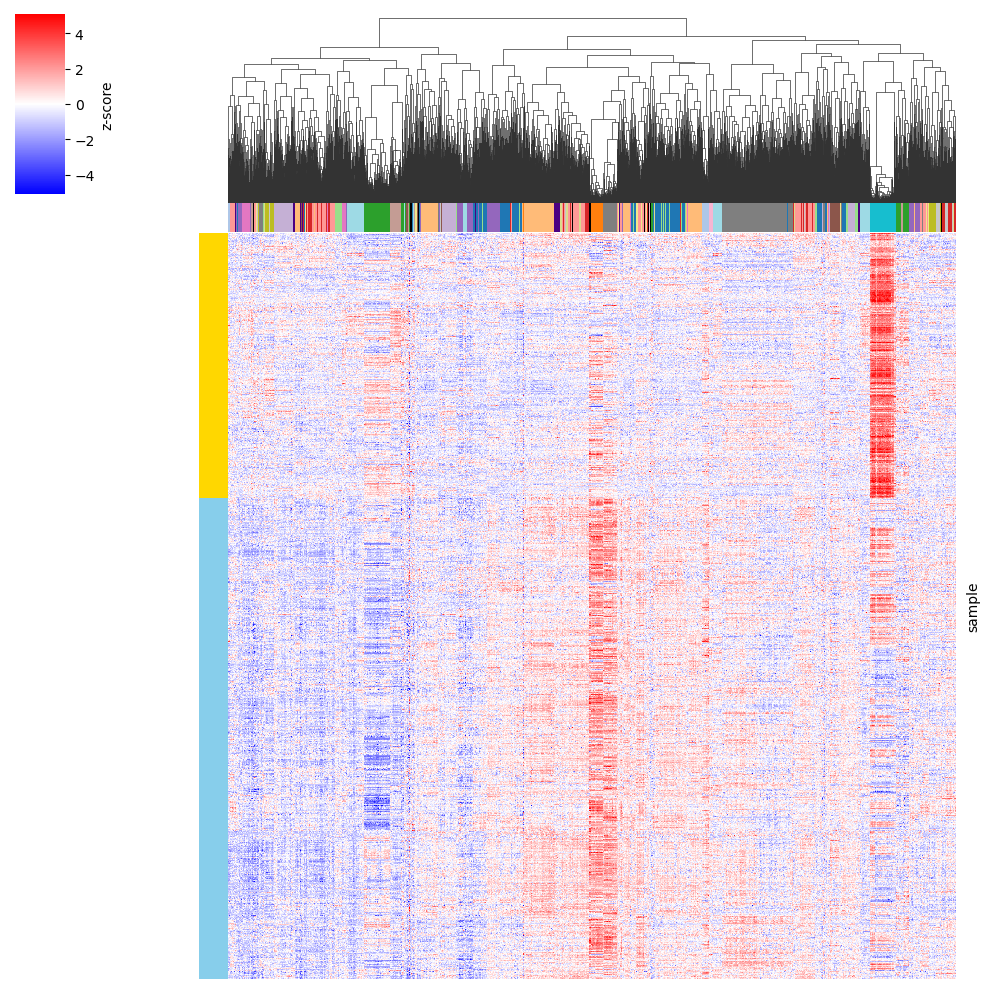

In [26]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

clustergrid = seaborn.clustermap(result, 
                                 cmap='bwr', 
                                 row_cluster=False, 
                                 col_cluster=True,
                                 vmin=-5.1, vmax=5.1, 
                                 cbar_kws={'label':'z-score'},
                                 xticklabels=False, yticklabels=False, 
                                 method=linkage_method, metric=distance_metric,
                                 row_colors=row_colors,
                                 col_colors=column_colors
                  )

# adding where isoforms fall
loc1 = numpy.where(result.index == iso1)[0][0]
loc2 = numpy.where(result.index == iso2)[0][0]
print(loc1, loc2)
#ax = clustergrid.ax_heatmap
#ax.add_patch(matplotlib.patches.Arrow(result.shape[1], loc1, dx=-100, dy=0, color='gold', width=100))
#ax.add_patch(matplotlib.patches.Arrow(result.shape[1], loc2, dx=-100, dy=0, color='skyblue', width=100))

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('heatmap.300.png', dpi=300)

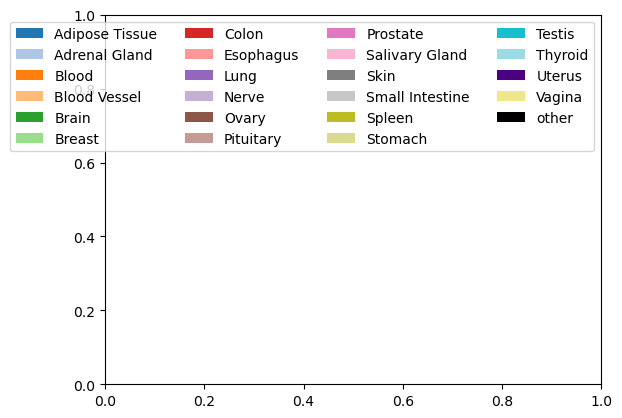

In [30]:
# legend
legend_elements = []
for legend_color in legend_colors:
    patch = matplotlib.patches.Patch(facecolor=legend_color)
    legend_elements.append(patch)

matplotlib.pyplot.legend(legend_elements, unique_tissues, ncol=4)

matplotlib.pyplot.savefig('legend.300.svg')

CPU times: user 1min 30s, sys: 412 ms, total: 1min 30s
Wall time: 1min 30s


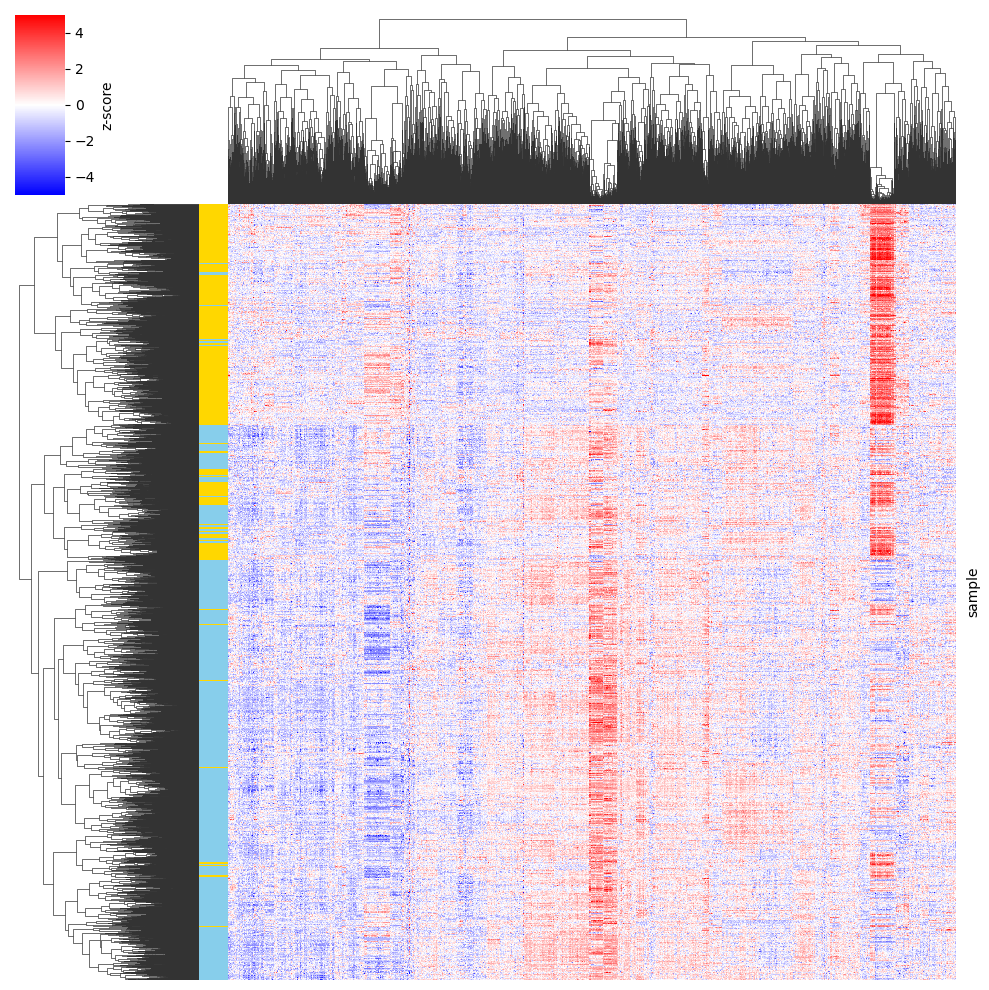

In [23]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.clustermap(result, 
                     cmap='bwr', 
                     row_cluster=True, 
                     col_cluster=True, 
                     vmin=-5, vmax=5, 
                     cbar_kws={'label':'z-score'},
                     xticklabels=False, yticklabels=False, 
                     method=linkage_method, metric=distance_metric,
                     row_colors=row_colors
                  )

# just the two transcripts

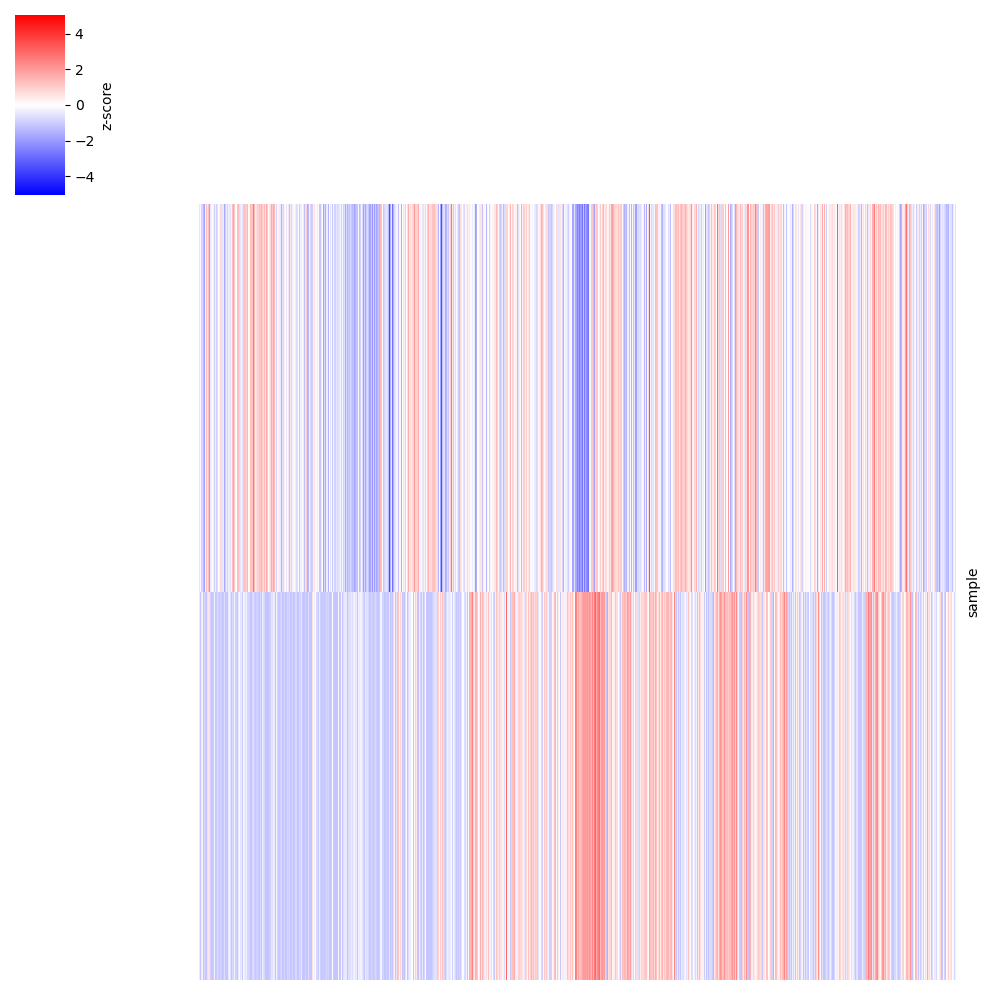

In [24]:
seaborn.clustermap(
    result.iloc[[loc1, loc2], clustergrid.dendrogram_col.reordered_ind], 
    cmap='bwr', 
    vmin=-5.05, vmax=5.05, 
    row_cluster=False, col_cluster=False, 
    cbar_kws={'label':'z-score'},
    xticklabels=False, yticklabels=False,  
)
matplotlib.pyplot.show()

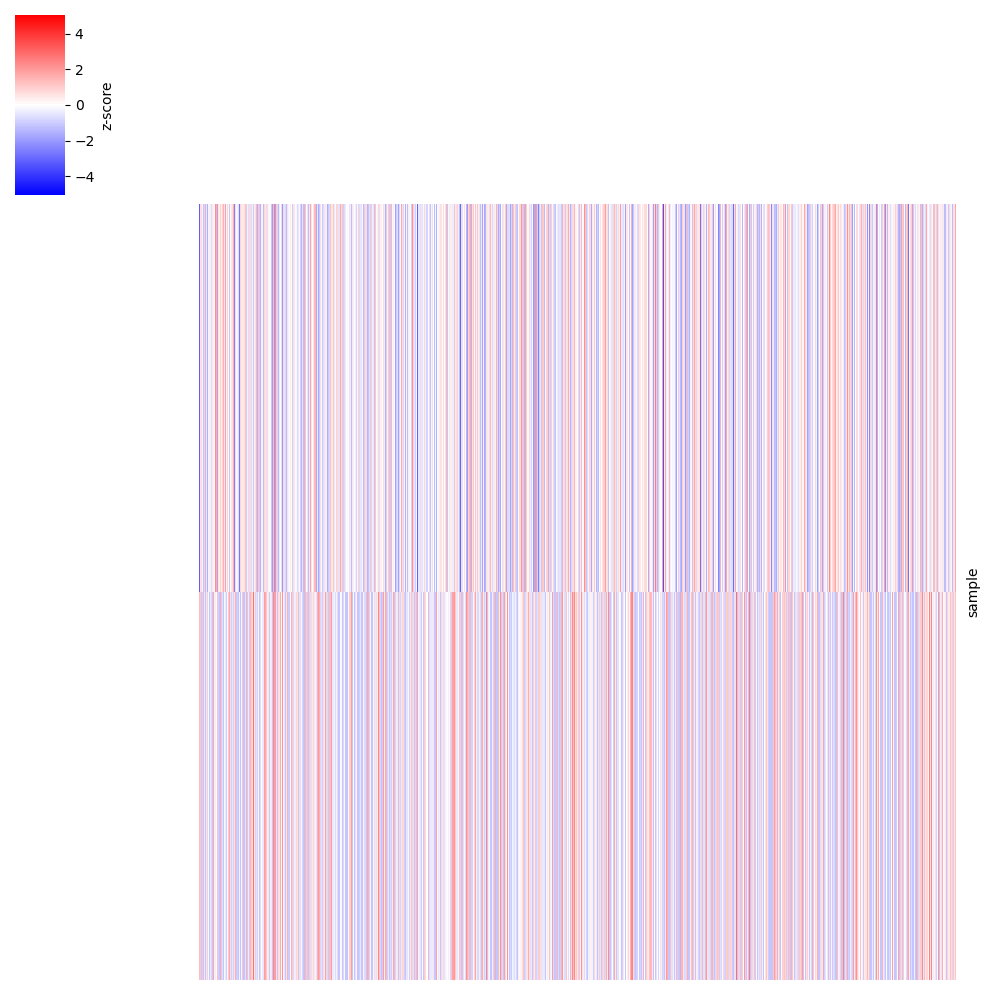

In [25]:
seaborn.clustermap(
    result.iloc[[loc1, loc2], :], 
    cmap='bwr', 
    vmin=-5.05, vmax=5.05, 
    row_cluster=False, col_cluster=False, 
    cbar_kws={'label':'z-score'},
    xticklabels=False, yticklabels=False,  
)
matplotlib.pyplot.show()

# go over all conditions and provide the most significanlty different 